In [23]:
import seaborn as sns
print(sns.__version__)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

0.11.0


## 1

In [219]:
with h5py.File(r'datasets.h5', 'r') as f:
    f.visititems(lambda name, obj:
        print('DATASET:' if isinstance(obj, h5py.Dataset) else 'GROUP: ',
              name + '\n' + obj.attrs.get('description', '') + '\n'))

DATASET: Titanic
Variable      Definition                      Key

PassengerId   ID of passenger
Survival      Survival                        0 = No, 1 = Yes
Pclass        Ticket class                    1 = 1st (upper), 2 = 2nd (middle), 3 = 3rd (lower)
Sex	          Sex
Age           Age in years
Sibsp         # of siblings/spouses aboard    Sibling = brother, sister, stepbrother, stepsister
                                              Spouse = husband, wife (mistresses and fiances were ignored)
Parch         # of parents/children aboard    Parent = mother, father
                                              Child = daughter, son, stepdaughter, stepson (some children
                                              travelled only with a nanny, therefore parch=0 for them)
Ticket        Ticket number
Fare          Passenger fare
Cabin         Cabin number
Embarked      Port of Embarkation             C = Cherbourg, Q = Queenstown, S = Southampton

DATASET: bank_marketing
Input variabl

## 2

In [25]:
df = pd.read_hdf('datasets.h5', 'bank_marketing')
df.head()

D:\anaconda\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'emp.var.rate'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
D:\anaconda\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'cons.price.idx'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
D:\anaconda\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'cons.conf.idx'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
D:\a

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.892998,-46.200001,1.313,5099.100098,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994003,-36.400002,4.855,5191.000000,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.464996,-41.799999,4.962,5228.100098,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.464996,-41.799999,4.959,5228.100098,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.199997,-42.000000,4.191,5195.799805,no


## 3

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   uint8  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   uint16 
 11  campaign        4119 non-null   uint8  
 12  pdays           4119 non-null   uint16 
 13  previous        4119 non-null   uint8  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float32
 16  cons.price.idx  4119 non-null   float32
 17  cons.conf.idx   4119 non-null   f

In [27]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084971,93.580009,-40.499290,3.621370,5166.517090
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563128,0.579354,4.594624,1.733586,73.667480
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.200996,-50.799999,0.635000,4963.600098
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.074997,-42.700001,1.334000,5099.100098
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749001,-41.799999,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994003,-36.400002,4.961000,5228.100098
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.766998,-26.900000,5.045000,5228.100098


## 4

#### 4.1

In [28]:
print(df['job'].unique())
df['job'].value_counts()

['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']


admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

#### 4.2

<AxesSubplot:>

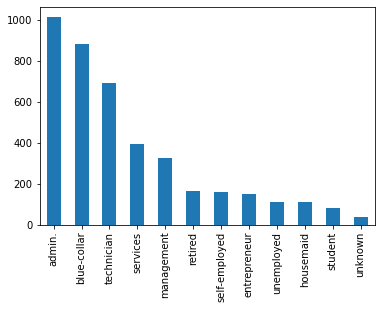

In [29]:
df['job'].value_counts().plot.bar()

#### 4.3

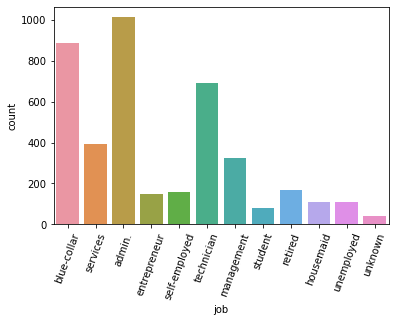

In [30]:
sns.countplot(x = 'job', data = df)
plt.xticks(rotation = 70);

## 5

In [34]:
chance = df.y.value_counts()/len(df['y'])
chance

no     0.890507
yes    0.109493
Name: y, dtype: float64

## 6

<AxesSubplot:xlabel='age', ylabel='Frequency'>

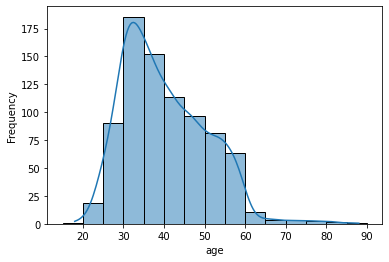

In [59]:
sns.histplot(x = 'age', data = df, 
             kde = True, stat = 'frequency',
            binwidth = 5, binrange = (15,90))

## 7

In [60]:
gr_y = df.groupby(by='y')

#### 7.1

In [61]:
print(gr_y.groups)

{'no': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 69, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, ...], 'yes': [19, 21, 25, 53, 59, 62, 68, 70, 71, 74, 87, 88, 115, 128, 132, 135, 139, 143, 150, 153, 165, 178, 179, 187, 196, 228, 233, 238, 261, 262, 263, 288, 292, 302, 308, 315, 338, 340, 364, 381, 420, 425, 448, 450, 469, 471, 477, 479, 483, 486, 493, 494, 501, 520, 536, 551, 556, 564, 570, 581, 582, 589, 600, 609, 619, 624, 625, 635, 639, 658, 660, 661, 664, 674, 679, 685, 689, 696, 699, 705, 719, 732, 733, 741, 743, 750, 779, 796, 824, 854, 870, 889, 908, 936, 943, 947, 954, 965, 968, 970, ...]}


#### 7.2

In [62]:
print(gr_y.size())

y
no     3668
yes     451
dtype: int64


#### 7.3

In [66]:
gr_y.get_group('yes')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.917999,-42.700001,4.961,5228.100098,yes
21,39,technician,divorced,high.school,no,no,no,cellular,mar,mon,...,1,12,2,success,-1.8,93.369003,-34.799999,0.639,5008.700195,yes
25,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444000,-36.099998,4.965,5228.100098,yes
53,24,technician,married,university.degree,no,yes,yes,cellular,sep,tue,...,2,3,1,success,-3.4,92.378998,-29.799999,0.770,5017.500000,yes
59,60,admin.,divorced,professional.course,no,yes,no,cellular,sep,wed,...,1,999,1,failure,-1.1,94.198997,-37.500000,0.886,4963.600098,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,74,retired,married,university.degree,no,yes,yes,cellular,aug,wed,...,3,999,0,nonexistent,-2.9,92.200996,-31.400000,0.854,5076.200195,yes
4066,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.600998,-49.500000,1.016,4963.600098,yes
4069,60,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.892998,-46.200001,1.354,5099.100098,yes
4088,47,management,married,university.degree,no,yes,no,cellular,sep,mon,...,1,3,2,success,-3.4,92.378998,-29.799999,0.771,5017.500000,yes


#### 7.4

In [67]:
gr_y.describe()

age                                                     duration  \
      count       mean        std   min   25%   50%   75%   max    count   
y                                                                          
no   3668.0  39.895311   9.865468  18.0  32.0  38.0  47.0  88.0   3668.0   
yes   451.0  41.889135  13.292977  18.0  31.0  39.0  51.0  86.0    451.0   

                ... euribor3m        nr.employed                          \
          mean  ...       75%    max       count         mean        std   
y               ...                                                        
no   219.40976  ...     4.962  5.045      3668.0  5175.502930  65.905045   
yes  560.78714  ...     4.855  4.970       451.0  5093.129883  90.607956   

                                                                      
             min          25%          50%          75%          max  
y                                                                     
no   4963.600098  5099.100098  5195.799805  5228.100098  5228.100098  
yes  4963.600098  5008.700195  5076.200195  5191.000000  5228.100098  

[2 rows x 80 columns]

In [73]:
gr_y[['age', 'campaign']].describe()

age                                                     campaign  \
      count       mean        std   min   25%   50%   75%   max    count   
y                                                                          
no   3668.0  39.895311   9.865468  18.0  32.0  38.0  47.0  88.0   3668.0   
yes   451.0  41.889135  13.292977  18.0  31.0  39.0  51.0  86.0    451.0   

                                                   
         mean       std  min  25%  50%  75%   max  
y                                                  
no   2.605780  2.670831  1.0  1.0  2.0  3.0  35.0  
yes  1.980044  1.370175  1.0  1.0  2.0  2.5  11.0

## 8

In [104]:
gr_y.job.value_counts()

y    job          
no   admin.           879
     blue-collar      823
     technician       611
     services         358
     management       294
     self-employed    146
     entrepreneur     140
     retired          128
     housemaid         99
     unemployed        92
     student           63
     unknown           35
yes  admin.           133
     technician        80
     blue-collar       61
     retired           38
     services          35
     management        30
     student           19
     unemployed        19
     self-employed     13
     housemaid         11
     entrepreneur       8
     unknown            4
Name: job, dtype: int64

In [128]:
y_job = gr_y.job.get_group('yes').value_counts()
n_job = gr_y.job.get_group('no').value_counts()
print(y_job['admin.']/(y_job['admin.']+n_job['admin.']))

0.13142292490118576


In [154]:
jobs = pd.Series()
for job in y_job.keys():
    jobs[job] = y_job[job]/(y_job[job]+n_job[job])
jobs.sort_values(ascending=False)

<ipython-input-154-4351813c79a7>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  jobs = pd.Series()


student          0.231707
retired          0.228916
unemployed       0.171171
admin.           0.131423
technician       0.115774
unknown          0.102564
housemaid        0.100000
management       0.092593
services         0.089059
self-employed    0.081761
blue-collar      0.069005
entrepreneur     0.054054
dtype: float64

## 9

In [168]:
yn_poutcome = gr_y['poutcome'].value_counts()
chance_poutcome = {}
for i in range(yn_poutcome['no'].size):
    chance_poutcome[yn_poutcome['no'].keys()[i]]=yn_poutcome['yes'][i]/yn_poutcome['no'][i]

In [169]:
chance_poutcome

{'nonexistent': 0.09037449705973383,
 'failure': 0.23772609819121446,
 'success': 1.34}

In [174]:
yn_education = gr_y['education'].value_counts()
chance_education = {}
for i in range(yn_education['yes'].size):
    chance_education[yn_education['no'].keys()[i]]=yn_education['yes'][i]/yn_education['no'][i]

In [175]:
chance_education

{'university.degree': 0.15013648771610555,
 'high.school': 0.11771844660194175,
 'basic.9y': 0.1224105461393597,
 'professional.course': 0.09148936170212765,
 'basic.4y': 0.09718670076726342,
 'basic.6y': 0.12322274881516587,
 'unknown': 0.12056737588652482}

## 10

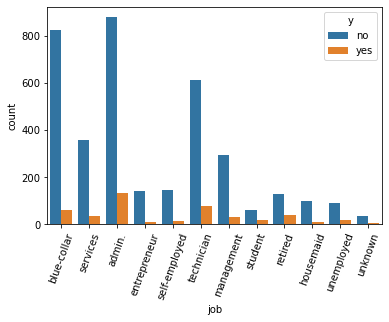

In [178]:
sns.countplot(x='job',data = df, hue = 'y')
plt.xticks(rotation=70);

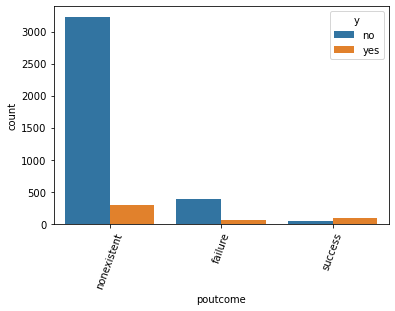

In [179]:
sns.countplot(x='poutcome',data=df, hue = 'y')
plt.xticks(rotation=70);

## 11

<AxesSubplot:xlabel='age', ylabel='Density'>

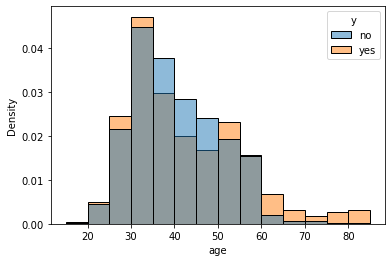

In [194]:
sns.histplot(x = 'age', data = df, hue = 'y',
            stat = "density", common_norm = False,
            binwidth = 5, binrange = (15,85))
#common_norm = True - нормує df, common_norm = False - нормує кожний стопчик

## 12

<AxesSubplot:xlabel='contact', ylabel='duration'>

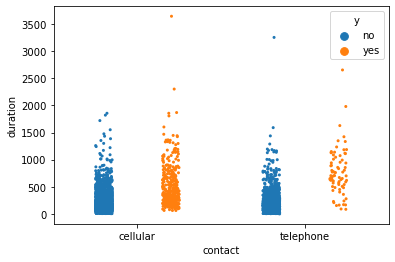

In [199]:
sns.stripplot( x = 'contact', y = 'duration', hue = 'y', data = df,
             size = 3, dodge = True)
#size - Розмір точок
#dodge = True - Відокремлює на дві групи

<AxesSubplot:xlabel='contact', ylabel='duration'>

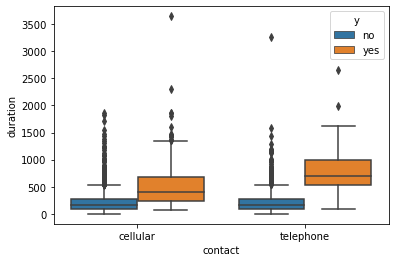

In [200]:
sns.boxplot(x='contact', y='duration', hue='y', data=df)

<AxesSubplot:xlabel='contact', ylabel='duration'>

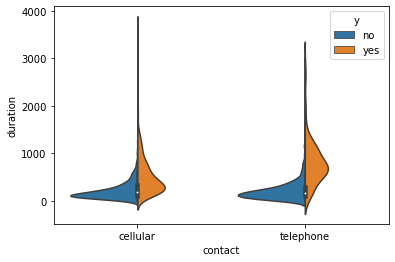

In [210]:
sns.violinplot(x='contact', y='duration', hue='y', data=df,
              split = True, scale = 'area')
#split - об'єднує два графіки, по половині з кожної сторони
#scale - используется для маштобирования. при area - то ничего не маштабируется

## 13

In [213]:
df['pdays'].replace({999:np.nan}, inplace = True)
df['pdays'].head(30)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21    12.0
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
Name: pdays, dtype: float64

## 14

<AxesSubplot:xlabel='pdays', ylabel='nr.employed'>

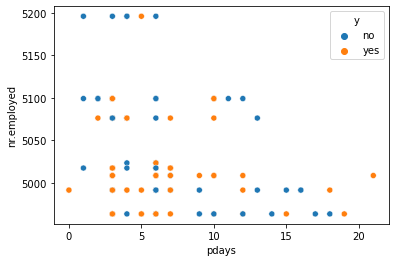

In [214]:
sns.scatterplot(x = 'pdays', y = 'nr.employed', hue = 'y', data = df)

## 15

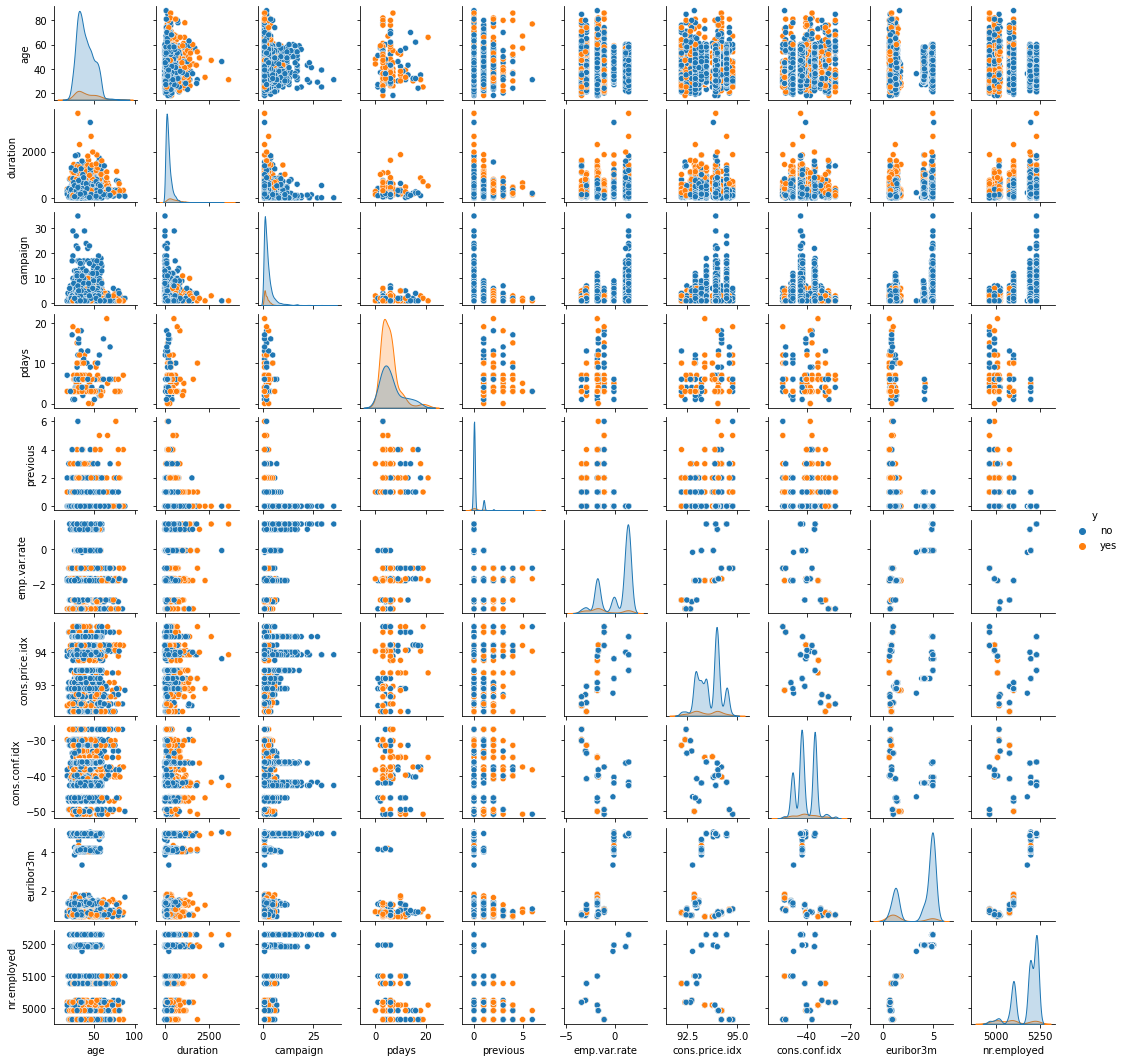

In [218]:
sns.pairplot(df, hue = 'y', height = 1.5)
#діаграми розсіювання, стовпчикові діаграми, частнотний розподіл"гістограми"

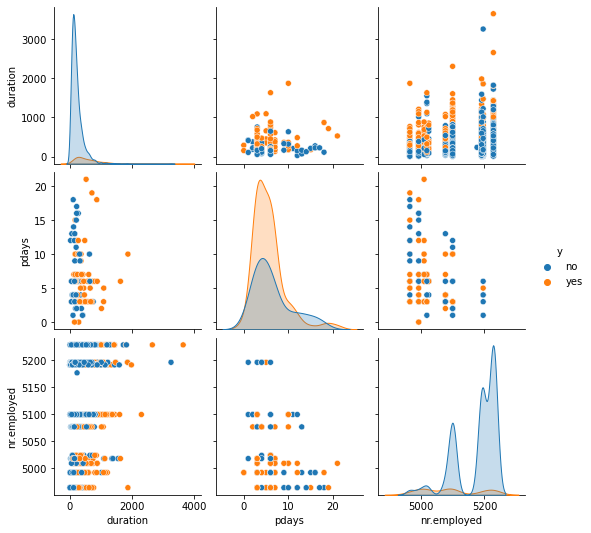

In [217]:
sns.pairplot(data = df, hue = 'y', vars = 'duration pdays nr.employed'.split())